# 히스토그램
- 영상을 구성하는 픽셀들의 빈도수를 측정하여 그래프(히스토그램)으로 표현
  
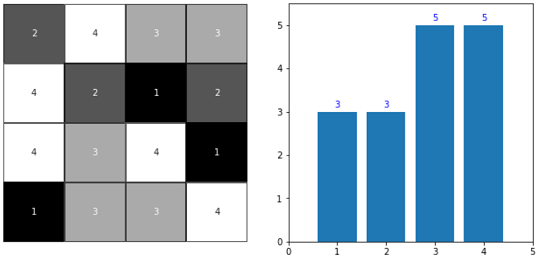

- **`cv2.calcHist(images, channels, mask, histSize, ranges, hist=None, accumulate=None)`**
    - images: 히스토그램을 구할 입력영상 리스트
    - channels: 히스토그램을 구할 채널 리스트
    - mask: 마스크 영상. 영상전체일 경우 None지정
    - histSize: 히스토그램 각 채널의 bin의 개수 리스트. 여기서는 각각의 픽셀값을 셀 것이므로 255개로 지정
    - ranges: 히스토그램을 이용해 빈도수를 셀 최솟값과 최대값을 리스트로 설정. [0, 256] 0 ~ 255 (마지막은 포함 안함)

### Grayscale 영상의 히스토그램 구하기

In [4]:
import cv2
import numpy as np

img = cv2.imread("images/window.jpg", cv2.IMREAD_GRAYSCALE)
np.multiply(*img.shape)

500544

In [14]:
# 도수분포표 -> history gram
hist = cv2.calcHist([img],  # 대상 이미지들
                        [0],      # 대상 채널
                        None,  # mask 지정-None 전체 영역
                        # [256],   # bins (몇개 그룹으로 나눌지). 256(개별적으로 세겠다.)
                        [50],     # histSize=50 # 50등분한 영역
                        [0, 256] # 개수를 셀 pixcel 값의 범위. (0 ~ 255)
                   )

In [15]:
type(hist), hist.shape  # (256:pixcel값, 1: 개수)

(numpy.ndarray, (50, 1))

In [17]:
# 픽셀값 0의 개수
hist[0]
# hist[150] # 픽셀값 150의 개수

array([0.], dtype=float32)

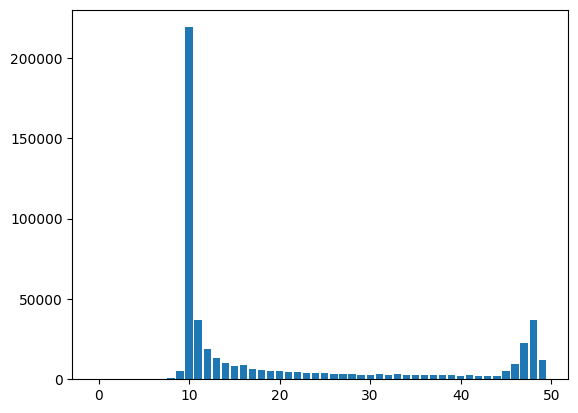

In [18]:
# 히스토그램
import matplotlib.pyplot as plt
plt.bar(np.arange(hist.size), hist.flatten())
plt.show()

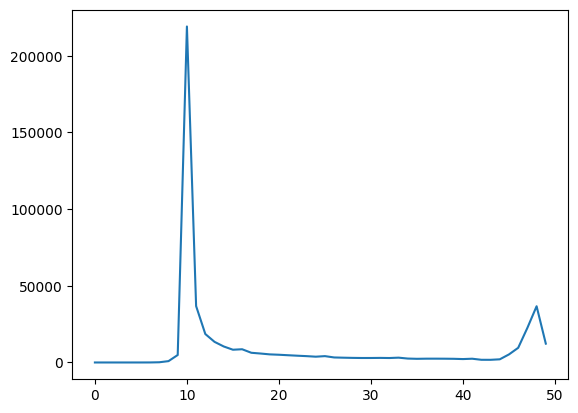

In [19]:
plt.plot(hist.flatten())
plt.show()

### 컬러영상의  히스토그램 구하기
- channel 별로 그린다.

In [20]:
img = cv2.imread("images/lenna.bmp")
# channel별로 분리해서 2차원 배열 만들기.
bgr_channels = cv2.split(img)
type(bgr_channels), len(bgr_channels)

(tuple, 3)

In [21]:
type(bgr_channels[0]), bgr_channels[0].shape

(numpy.ndarray, (512, 512))

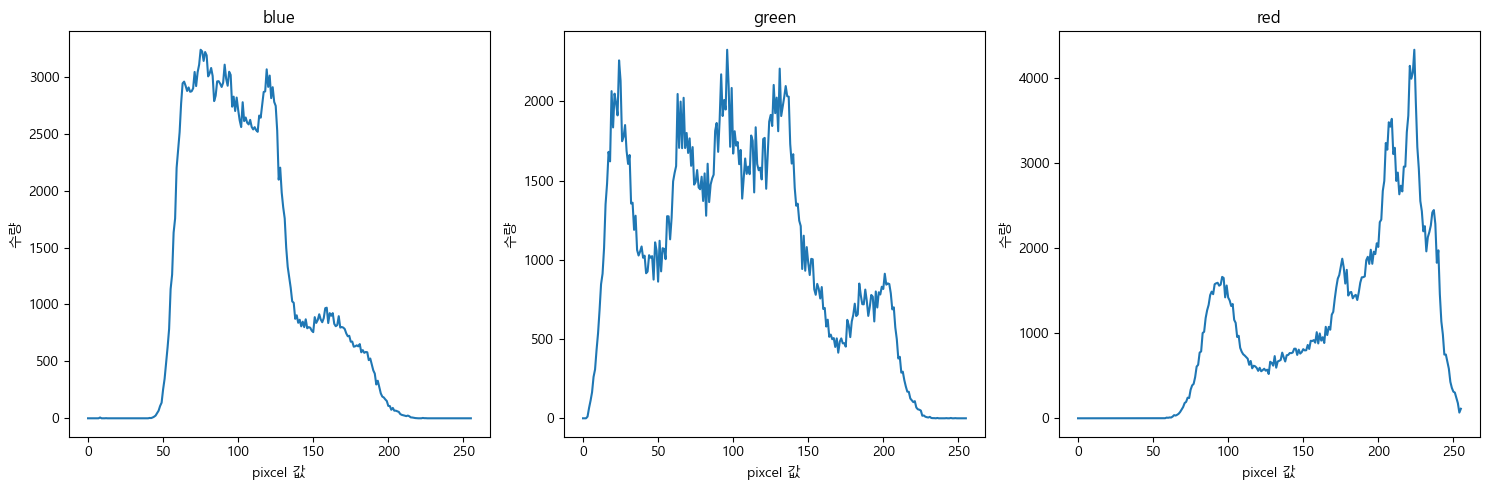

In [32]:
plt.rcParams['font.family'] = "malgun gothic"
plt.rcParams['axes.unicode_minus'] = False

color_label = ["blue", "green", "red"]
plt.figure(figsize=(15, 5))

for idx, (channel, color) in enumerate(zip(bgr_channels, color_label)):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.subplot(1, 3, idx+1)
    plt.plot(range(256), hist.flatten())
    plt.title(color)
    plt.xlabel("pixcel 값")
    plt.ylabel("수량")

plt.tight_layout()
plt.show()

In [29]:
a = ["bc", "gc", "rc"]
b = ['b', 'g', 'r']
for idx, (channel, color) in enumerate(zip(a, b)):
    print(idx,channel, color)
    

0 bc b
1 gc g
2 rc r


In [1]:
#### 히스토그램을 그리는 함수
import cv2
def plot_hist(src):
    """
    src: ndarray - 개별 채널 을 받아서 histogram 출력
    """
    plt.rcParams['font.family'] = "malgun gothic"
    plt.rcParams['axes.unicode_minus'] = False
    
    hist = cv2.calcHist([src], [0], None, [256], [0, 256])
    plt.plot(range(256), hist.flatten())
    plt.xlabel('pixcel')
    plt.ylabel('count')
    plt.show()

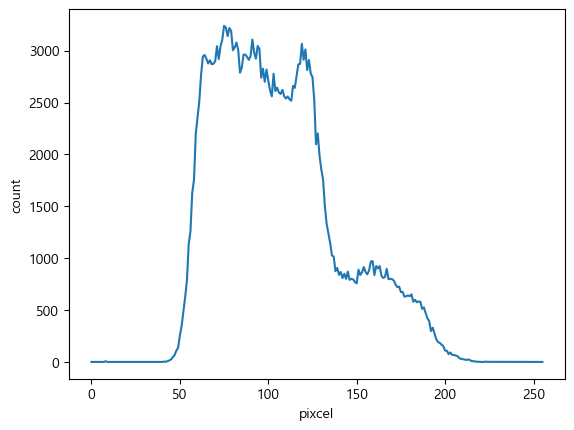

In [38]:
plot_hist(bgr_channels[0])

In [6]:
import numpy as np

a = np.array([0, 255], dtype='uint8')
print(a)
print(a - 1)
print(a + 1)

[  0 255]
[255 254]
[1 0]


# 연산을 이용한 영상처리
- opencv는 영상의 pixcel 값들을 uint8 타입의 ndarray로 다룬다.   그리고 영상의 pixcel값에 다양한 연산을 통해 다양한 처리를 할 수 있다.
- opencv는 다양한 연산함수들을 제공한다.

## uint8 타입 ndarray 연산의 문제
- ndarray의 uint8의 값의 범위는 0 ~ 255 사이 이다.
- ndarray의 uint8(unsigned int8)은 연산결과가  0 ~ 255범위를 넘어가는 숫자는 순환되어 버린다. 
    - 계산결과가 0이하가 되면 255로 부터 작아지게 되고 255가 넘어가면 0으로 가서 커지게 된다
        - `... 0 ~ 255, 0 ~ 255, 0 ~ 255 ... `  구조에서 계산된다고 생각하면 된다.
        - 그래서 계산 결과 영상이 반전되는 등 우리가 원하는 형태가 안될 수 있다.
## Saturate 연산
- uint8 타입의 ndarray 연산 결과가 0 이하가 되면 0으로 255 이상이 되면 255가 되도록 연산하는 것을 말한다.
- opencv 의 연산함수들은 이 saturate 연산이 되도록 한다.

![saturate](figures/saturate.png)

## 밝기 조절하기(brightness)
- 영상을 전체적으로 밝게 또는 어둡게 만드는 연산
- 밝기 조절 수식 (덧셈)
    - 원본좌표(x,y) + n
    - n이 양수면 각 좌표의 픽셀값이 커지므로 밝아진다.
    - n이 음수이면 각 좌표의 픽셀값이 작아지므로 어두워 진다.
      
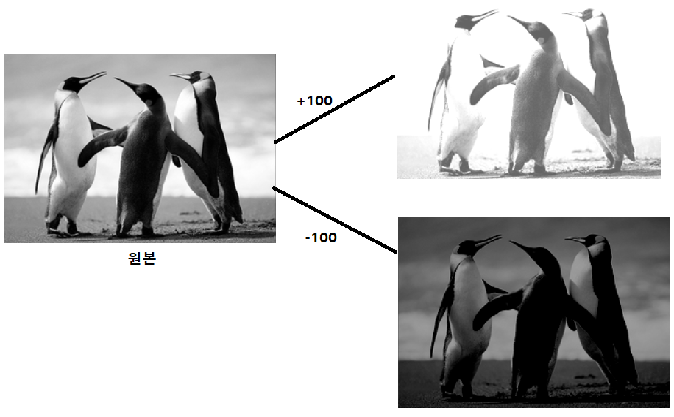
    
- **`cv2.add(src1, src2)`**
    - 덧셈 처리
    - **밝기 조절이나 두 영상을 합치기에 사용할 수 있다.**
    - src1: 첫번째 영상 또는 스칼라
    - src2: 두번째 영상 또는 스칼라
    - src2를 src1에 더한다.

In [44]:
import cv2
img = cv2.imread("images/penguin_gray.jpg", cv2.IMREAD_GRAYSCALE)
# pixcel값을 더하면 밝아지고 빼면 어두워진다.
result1 = cv2.add(img, 100)
result2 = cv2.add(img, -100)
cv2.imshow("src", img)
cv2.imshow("result", (img + 100))
cv2.imshow("result1", result1)
cv2.imshow("result2", result2)

cv2.waitKey()
cv2.destroyAllWindows()

In [45]:
result1

array([[255, 255, 255, ..., 244, 244, 245],
       [255, 255, 255, ..., 244, 244, 244],
       [255, 255, 255, ..., 246, 246, 245],
       ...,
       [215, 213, 223, ..., 200, 223, 236],
       [238, 206, 224, ..., 212, 212, 214],
       [227, 227, 205, ..., 220, 226, 217]], dtype=uint8)

In [42]:
img + 100

array([[  7,   5,   5, ..., 244, 244, 245],
       [  7,   7,   8, ..., 244, 244, 244],
       [  8,   7,   9, ..., 246, 246, 245],
       ...,
       [215, 213, 223, ..., 200, 223, 236],
       [238, 206, 224, ..., 212, 212, 214],
       [227, 227, 205, ..., 220, 226, 217]], dtype=uint8)

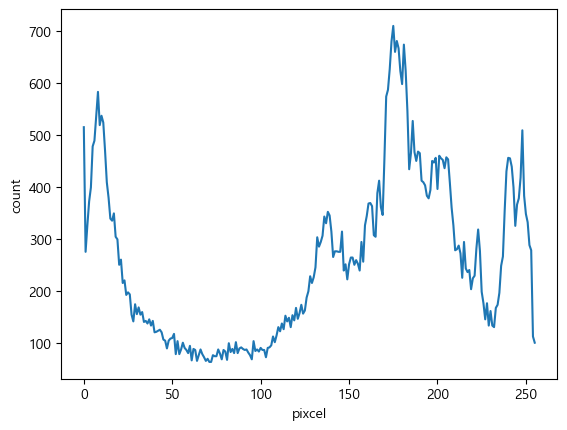

In [47]:
plot_hist(img)

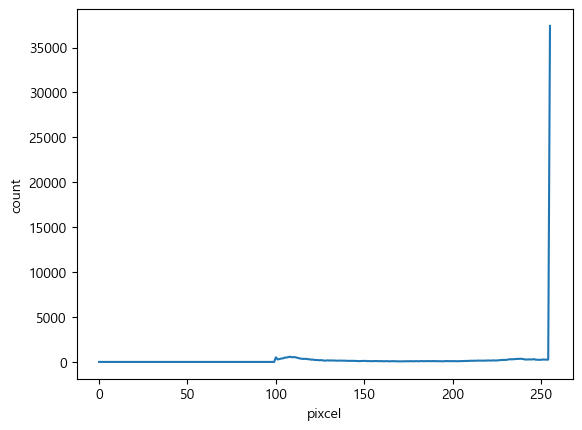

In [48]:
plot_hist(result1)

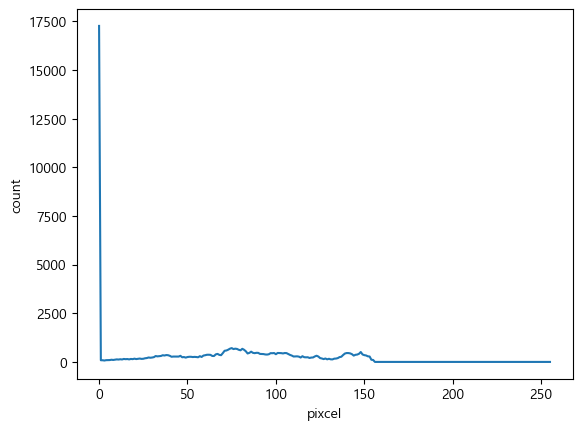

In [49]:
plot_hist(result2)

In [60]:
###### color
img = cv2.imread("images/penguin.jpg")
#### bgr 모드
result1 = cv2.add(img, (100, 100, 100))  # 채널별로 계산을 따로. (b, g, r, a:투명도)
result2 = cv2.add(img, 100)  # 채널별로 동일한 값을 더할 경우.
result3 = cv2.add(img, -100)

cv2.imshow("src", img)
cv2.imshow("r1", result1)
cv2.imshow("r2", result2)
cv2.imshow("r3", result3)
cv2.waitKey()
cv2.destroyAllWindows()

In [57]:
img = cv2.imread("images/penguin.jpg")
############# HSV 변환 후 밝기 처리 - H(색상), S(채도), V(밝기-명암)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
r1 = cv2.add(img_hsv, (0, 0, 100))  # Value 채널만 변경
r2 = cv2.add(img_hsv, (0, 0, -100))

cv2.imshow("src", img)
cv2.imshow("R1", cv2.cvtColor(r1, cv2.COLOR_HSV2BGR)) # 이미지 출력 -> BGR
cv2.imshow("R2", cv2.cvtColor(r2, cv2.COLOR_HSV2BGR))
cv2.waitKey()
cv2.destroyAllWindows()

## add를 이용해 두 영상 합치기

In [64]:
img1 = cv2.imread("images/penguin_gray.jpg")#, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("images/lenna.bmp")#, cv2.IMREAD_GRAYSCALE)
# img1.shape, img2.shape

# resize img1을 (512, 512) 로 늘리기. (img1 + img2 -> shape이 같아야 함.)
img1_rs = cv2.resize(img1, [512, 512])  # resize할 크기 [width, height]
result = cv2.add(img1_rs, img2)  # img + img -> 배열 + 배열

cv2.imshow("img1", img1_rs)
cv2.imshow("img2", img2)
cv2.imshow("add", result)
cv2.waitKey()
cv2.destroyAllWindows()


## 명암비(Contrast) 조정

### 명암비/대비(Contrast)란
- 밝은 부분과 어두분 부분 사이의 밝기의 정도 차이
    - Low contrast: 영상이 전체적으로 밝은 픽셀들로만 구성되거나 어두운 픽셀들로만 구성되면 명암비가 낮다고 표현한다. 
    - High contrast: 영상에 밝은 영역과 어두운 영역이 골고루 섞여있으면 명암비가 높다고 표현한다.
- 명암비가 낮으면 객체간의 구분이 되지 않아 흐릿한 느낌이 나고 명암비가 높으면 선명한 느낌이 든다.
![image.png](figures/contrast.png)


### 연산을 이용해 명암비 조절
- 명암비를 변환하는 함수공식
    - 어두운 픽셀은 더 어둡게, 밝은 픽셀은 더 밝게 한다.

\begin{align}
&g(x, y)=f(x,y)+(f(x,y)-128) \alpha\\
&==\\
&(1+\alpha)f(x, y)-\alpha 128\\
\end{align}

\begin{align}
&{\small g(x, y): 결과\;image의\;x, y\;좌표\;pixcel}\\
&{\small f(x, y): 원본\;image의\;x, y\;좌표\;pixcel}\\
&{\small x:\;pixcel의\;x좌표}\\
&{\small y:\;pixcel의\;y좌표}\\
&{\small \alpha:\;대비를\;조절하는\;값.}\\
&{\quad \small  0-\;원본과\;동일,\;음수-\;명암비\;낮추기,\;양수-\;명암비 높이기}
\end{align}

![image.png](figures/contrast2.png)
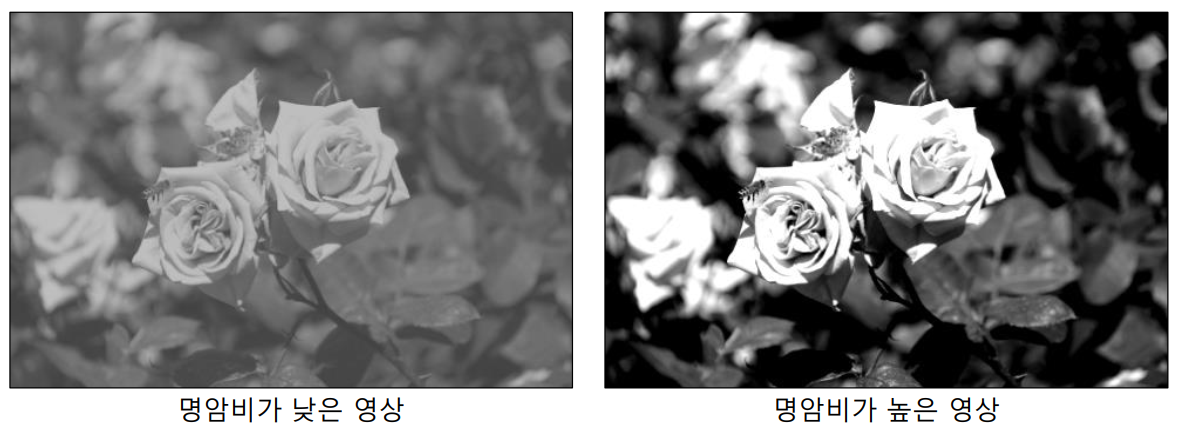

In [69]:
import cv2
import numpy as np

def change_contrast(img:"uint8", alpha=0.0):
    return np.clip((1.0 + alpha)*img - 128 * alpha,  0, 255).astype("uint8")

In [ ]:
# 실수 + 정수(uint포함) => 정수를 실수로 변환후에 계산
# (1.0 + alpha)*img
# 실수 * uint8 => 실수 * 실수 => 결과: 실수 ==> astype()이용해서 uint8 타입으로 변환

In [67]:
np.clip([-10.5, 50.7, 300.234],   # 대상 배열
          0,                 # 범위의 최소값
        255)                # 범위의 최대값.   
# 배열에서 최소값이하는 지정한 최소값으로, 최대값 이상은 지정한 최대값으로 수렴

array([  0. ,  50.7, 255. ])

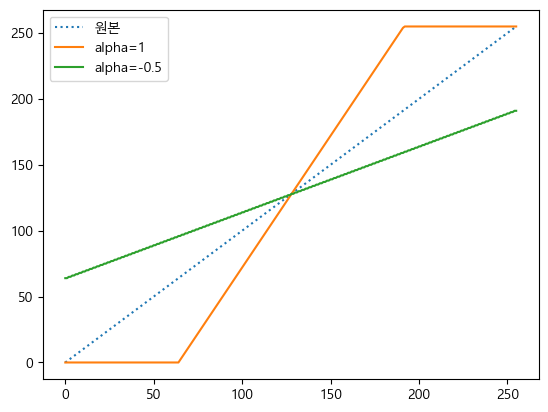

In [71]:
import matplotlib.pyplot as plt

b0 = np.arange(256)
b1 = change_contrast(b0, alpha=1)      # 양수: 대비를 높인다.
b2 = change_contrast(b0, alpha=-0.5)  # 음수: 대비를 낮춘다.

plt.plot(b0, linestyle=":", label="원본")
plt.plot(b1, label="alpha=1")
plt.plot(b2, label="alpha=-0.5")
plt.legend()
plt.show()

In [76]:
img = cv2.imread("images/low_contrast.png", cv2.IMREAD_GRAYSCALE)

result1 = change_contrast(img, alpha=1)
result2 = change_contrast(img, alpha=1.3)
result3 = change_contrast(img, alpha=-0.5)

cv2.imshow("src", img)
cv2.imshow("alpha=1", result1)
cv2.imshow("alpha=1.3", result2)
cv2.imshow("alpha=-0.5", result3)
cv2.waitKey()
cv2.destroyAllWindows()

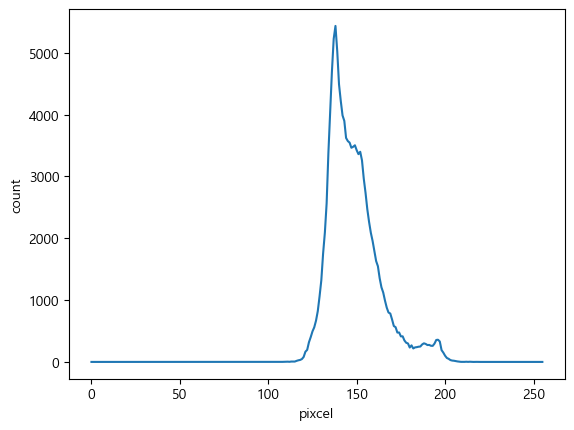

In [73]:
plot_hist(img)

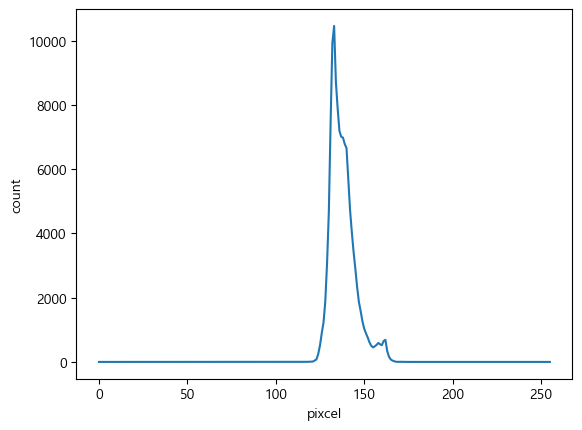

In [78]:
plot_hist(result3)

In [89]:
lenna = cv2.imread("images/lenna.bmp")
# HSV: Value(명암)
lenna_hsv_low = cv2.cvtColor(lenna, cv2.COLOR_BGR2HSV)
lenna_hsv_high = lenna_hsv_low.copy()

# hsv 에서 value만 조회해서 변경한 뒤에 이미지의 value를 변경한 값으로 바꾸기.
result_low = change_contrast(lenna_hsv_low[:, :, 2], alpha=-0.5) # Value 채널 값을 변경
lenna_hsv_low[:, :, 2]  = result_low   # image의 value를 변경.

lenna_hsv_high[:, :, 2] = change_contrast(lenna_hsv_high[:, :, 2], alpha=0.5)

In [90]:
cv2.imshow("src", lenna)
cv2.imshow("0.5", cv2.cvtColor(lenna_hsv_high, cv2.COLOR_HSV2BGR))
cv2.imshow("-0.5", cv2.cvtColor(lenna_hsv_low, cv2.COLOR_HSV2BGR))
cv2.waitKey()
cv2.destroyAllWindows()

### 히스토그램 평활화
- Pixcel값들의 범위가 좁으면 밝기 값들이 한쪽에 몰려 있어 어둡거나 밝기만 한 영상이 되어 대비(constrast) 가 낮게 된다 . 히스토그램 평활화는 이런 영상의 pixcel값들의 범위를 넓게 만들어 더 선명한 영상을 만드는 기법이다.
- **Grayscale(회색조) 영상**은 입력 영상에 바로 히스토그램 평활화를 적용하면 되는데 **컬러 영상**은 HSV와 같이 밝기값 channel을 가진 색모드로 변환한 다음, 밝기값 채널 (V)에 히스토그램 평활화를 적용 후 BGR(또는 RGB) 색모드로 변환하여 처리한다.


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/low_contrast.png", cv2.IMREAD_GRAYSCALE)
# 히스토그램 평활화 => 대비를 높이는 작업
img_high = cv2.equalizeHist(img)

cv2.imshow("src", img)
cv2.imshow("equ", img_high)
cv2.waitKey()
cv2.destroyAllWindows()

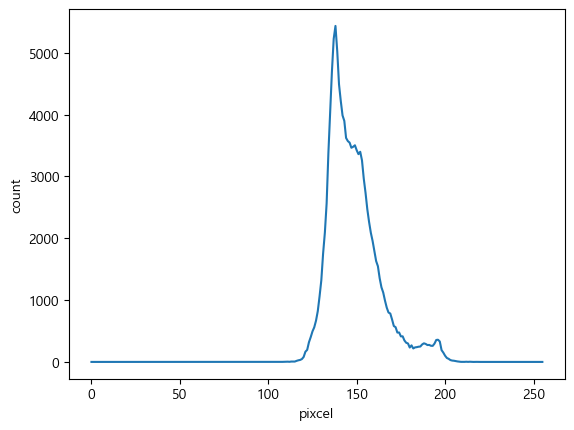

In [13]:
plot_hist(img)

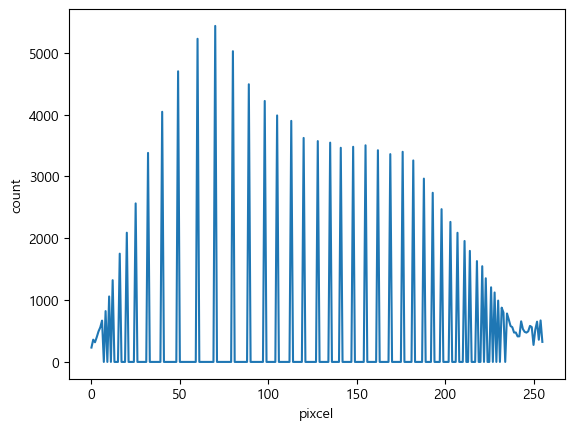

In [14]:
plot_hist(img_high)

## 샤프닝(Sharpen)
- Blurring의 반대로 흐린영상을 선명한 영상으로 만드는 작업.
- 선명한 영상을 만들기 위해서는 이미지의 엣지(edge-사물의 윤곽부분)의 대비를 크게 만들어 준다.
    - 이미지 전체를 다 선명하게 하는 게 아니라 **윤곽(edge)만 선명하게 만들어 명암비(contrast)를 크게해 선명하게 보이게 한다.**
    - 히스토그램 평활화와 달리 **전체적인 명암은 유지하면서** 물체들을 더 선명하게 만들어 준다.
- Unsharp mask(언샤프 마스크) 필터링
    - Unsharp한 영상을 이용해 Sharp한 영상을 만든다고 해서 Unsharp mask filtering 이라고 한다.
    - 원본 이미지에서 blurring 한 이미지를 뺀다음 그것을 원본이미지에 다시 더한다.
\begin{align}
&h(x) = f(x)+\alpha(f(x)-\bar{f}(x))\\
\\
&{\small f(x): 원본\;이미지}\\
&{\small \bar{f}(x):\;원본\;이미지를\;blurring한\;이미지}\\
&{\small \alpha: shappening 정도\,조절값}
\end{align}



![a](figures/sharpen.png)
- 제공 함수는 없고 위 공식을 구현한다.
    - `addWeighted(src, src_가중치, src2, src2_가중치, 더해줄값)`
        - 가중합 계산 함수
        - $src\times src가중치 + src2\times src2가중치 + 더해줄값$

In [42]:
import cv2
import numpy as np

In [49]:
def unsharp_masking(img, alpha=1.0):
    # 1. 블러처리
    X_blur = cv2.GaussianBlur(img, (0, 0), 2)
    img = img.astype("float64")
    return np.clip(img + (img - X_blur) * alpha, 0, 255).astype('uint8')

In [54]:
def unsharp_masking2(img, alpha=1.0):
    X_blur = cv2.GaussianBlur(img, (0, 0), 2)
    return cv2.addWeighted(img, 1+alpha, X_blur, -alpha, 0)  # 가중합
# img * (1 + alpah) + X_blur * -alpah   + 0

In [55]:
img = cv2.imread("images/low_contrast.png", cv2.IMREAD_GRAYSCALE)
img_sharp = unsharp_masking2(img)
img_sharp2 = unsharp_masking2(img, alpha=2)

cv2.imshow("src", img)
cv2.imshow("alpha 1", img_sharp)
cv2.imshow("alpha 2", img_sharp2)
cv2.waitKey()
cv2.destroyAllWindows()

## 채도 (Saturation) 변환
- 채도
    -  색의 선명도를 말한다.
- 채도를 변환할 때는 HSV color 타입으로 변환한 뒤 S의 값을 바꾼다. (덧셈 연산)
> HSV : 색상(Hue), 채도(Saturation), 명도(Value)

In [20]:
img = cv2.imread("images/low_saturation.jpg")

img_high_sat = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_low_sat = img_high_sat.copy()

# 채도 변경 -> H, S(채도), V 에서 S채널에 덧셈 연산.
img_high_sat[:, :, 1] = cv2.add(img_high_sat[:, :, 1], 50)
img_low_sat[:, :, 1] = cv2.add(img_low_sat[:, :, 1], -30)

# BGR로 변경
img_high_sat = cv2.cvtColor(img_high_sat, cv2.COLOR_HSV2BGR)
img_low_sat = cv2.cvtColor(img_low_sat, cv2.COLOR_HSV2BGR)

In [21]:
cv2.imshow("src", img)
cv2.imshow("high", img_high_sat)
cv2.imshow("low", img_low_sat)
cv2.waitKey()
cv2.destroyAllWindows()

## bitwise 연산
- bit 단위 연산으로 `and`, `or`, `xor`, `not` 가 있다.
|bit1|bit2|and|or|xor|
|-|-|-:|-:|-:|
|1|1|1|1|0|
|1|0|0|1|1|
|0|1|0|1|1|
|0|0|0|0|0|

- not은 1 -> 0, 0 -> 1 로 변환한다.

### 연산자
- bitwise_and(img1, img2)
- bitwise_or(img1, img2)
- bitwise_xor(img1, img2)
- bitwise_not(img1)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

img1 = np.zeros( (400, 400), dtype='uint8')
img2 = np.zeros( (400, 400), dtype='uint8')
img1[:  ,   :200] = 255
img2[200:  ,  :] = 255

In [24]:
# bit : 255-모든비트가 1,    0-모든비트가 0
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

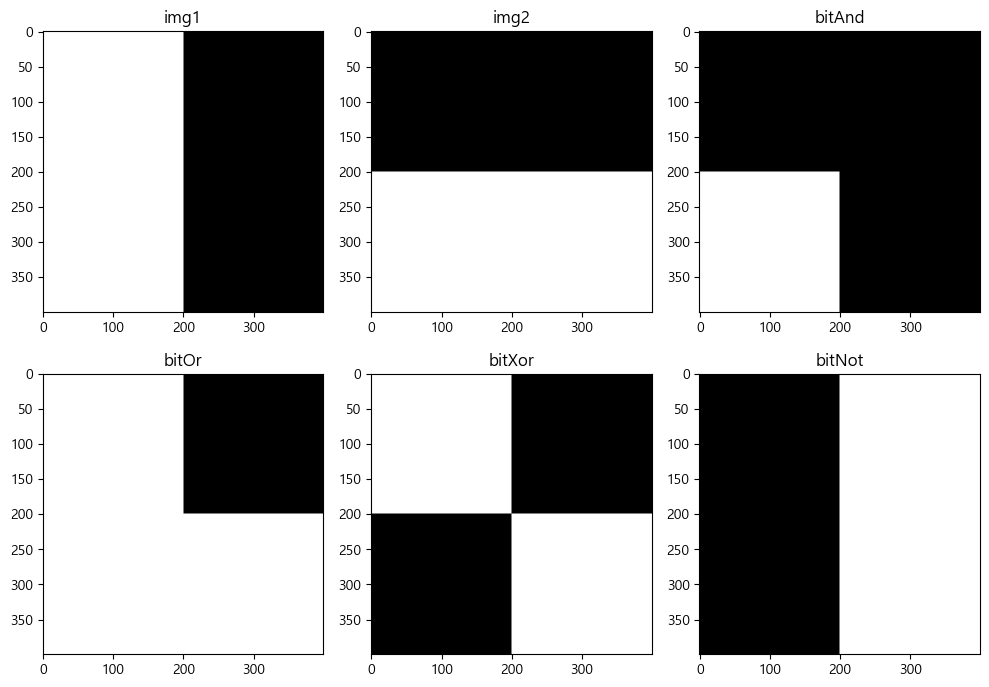

In [28]:
bit_list = [img1, img2, bitAnd, bitOr, bitXor, bitNot]
label_list = ["img1", "img2", "bitAnd", "bitOr", "bitXor", "bitNot"]

plt.figure(figsize=(10, 7))
for idx, (bit, label) in enumerate(zip(bit_list, label_list)):
    plt.subplot(2, 3, idx+1)
    plt.title(label)
    plt.imshow(bit, cmap="gray")
    
plt.tight_layout()
plt.show()
# black: 0, white: 255

In [40]:
img = cv2.imread("images/dog.jpg")
mask = np.zeros_like(img)   # img와 동일한 shape의 원소가 모두 0인 배열
# 원 표시
cv2.circle(mask, # 대상
            (365, 115), # 원 중심점 좌표
            110,      # 반지름
             (255, 255, 255), # 채울값.
            -1, # 원을 채울값으로 채운다. 양수일 경우는 원을 그릴때 선두께.
          )
result1 = cv2.bitwise_and(img, mask)
result2 = cv2.bitwise_or(img, mask)

In [41]:
cv2.imshow("frame", img)
cv2.imshow("and", result1)
cv2.imshow("or", result2)
cv2.waitKey()
cv2.destroyAllWindows()